<a href="https://colab.research.google.com/github/shashankbhatia15/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/AlmaBetter/M1-PYTHON/Airbnb Bookings Analysis - Shashank Bhatia/'

In [4]:
df=pd.read_csv(path + '/Airbnb NYC 2019.csv')

In [5]:
df_air=df.copy()

In [6]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df_air.drop(['last_review'],axis=1,inplace=True)


In [9]:
df_air['reviews_per_month']=df.reviews_per_month.fillna(0)
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [10]:
'''df.fillna(value={'name':'NA'},inplace=True)
df['host_name'].fillna('NA',inplace=True)'''

"df.fillna(value={'name':'NA'},inplace=True)\ndf['host_name'].fillna('NA',inplace=True)"

In [11]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
#df.sort_values(by=['price'])

In [13]:
len(df_air['price'][df_air['price']<=20])

87

In [14]:
df_air['price'][df_air['price']<=20]=106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

# **Room_types vs price on different neighbourhood groups**

In [16]:
price_roomtype=df_air.groupby(['room_type'])['price'].mean().to_frame().reset_index()
price_roomtype
#price_roomtype.info()

,room_type,price
0,Entire home/apt,211.868472
1,Private room,89.911269
2,Shared room,72.890517


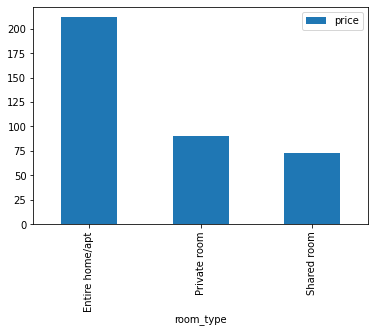

In [17]:

price_roomtype.plot(kind='bar', x='room_type',y='price')
#plt.xlabel('roomtype')
#plt.ylabel('price')
plt.show()


In [18]:
df_air.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,67.098160,68.400000
Brooklyn,178.397531,76.668377,54.406780
Manhattan,249.296538,116.868579,89.556250
Queens,147.269561,71.816429,72.202020
Staten Island,173.846591,62.750000,77.333333


In [19]:
price_by_nbh_g=df_air.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()

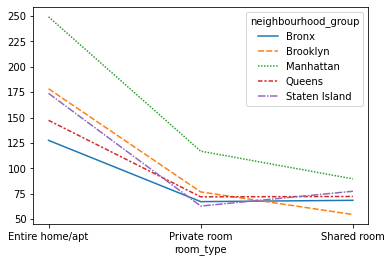

In [20]:
#plt.figure(figsize=(100,5))
sns.lineplot(data=price_by_nbh_g)

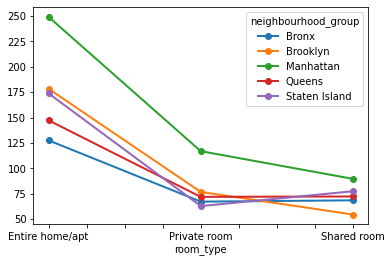

In [42]:
price_by_nbh_g.plot(linewidth=2,markersize=6,marker='o')

# FOOTFALL PER room type

In [22]:
rt_rev=df_air.groupby('room_type')['number_of_reviews'].sum()
rt_rev

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

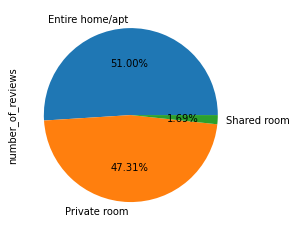

In [23]:
rt_rev.plot(kind='pie',autopct='%1.2f%%')

In [24]:
df_air.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


In [25]:
nbh_g_rt_rev=df_air.groupby(['room_type','neighbourhood_group'])['number_of_reviews'].sum().unstack()

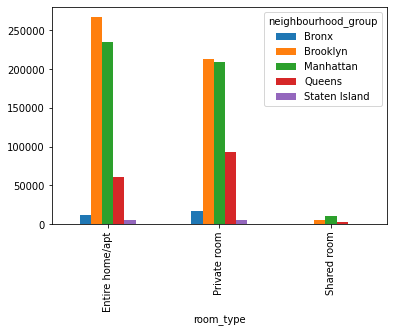

In [26]:
nbh_g_rt_rev.plot(kind='bar')


# **availability-price corr**

In [27]:
nbh_g_avail_price_corr=df_air.groupby('neighbourhood_group')['availability_365','price'].mean().reset_index()
nbh_g_avail_price_corr


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,neighbourhood_group,availability_365,price
0,Bronx,165.758937,88.154904
1,Brooklyn,100.232292,124.580979
2,Manhattan,111.979410,196.957527
3,Queens,144.451818,99.741970
4,Staten Island,199.678284,115.522788


In [28]:
df_corr=nbh_g_avail_price_corr.corr()
df_corr

,availability_365,price
availability_365,1.00000,-0.52724
price,-0.52724,1.00000


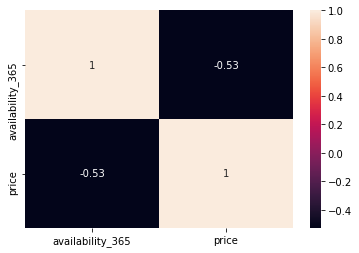

In [29]:
sns.heatmap(df_corr,annot=True)

# **LOCATION ON SCATTERPLOT**

[Text(0.5, 1.0, 'as')]

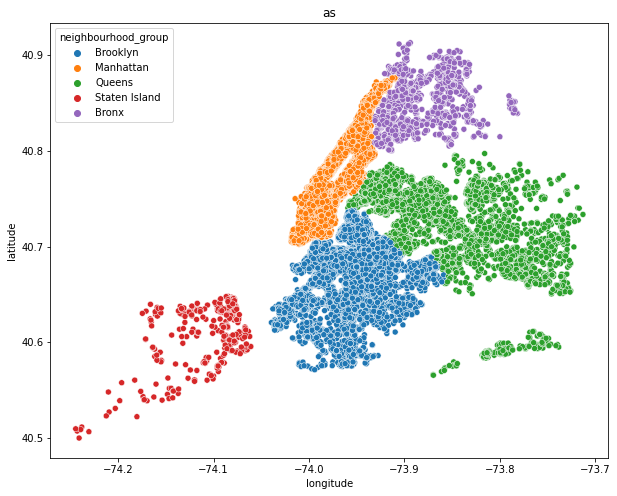

In [30]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="longitude",y="latitude",data=df_air,hue="neighbourhood_group")
ax.set(title='as')

In [31]:
df2=df_air.groupby('neighbourhood_group')['id'].count().to_frame().reset_index()
df2

,neighbourhood_group,id
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


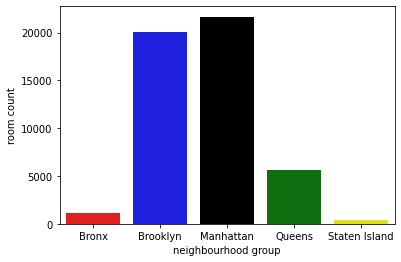

In [32]:
ax=sns.barplot(y="id",data=df2,x="neighbourhood_group",palette=['red','blue','black','green','yellow']) 
ax.set(xlabel="neighbourhood group",ylabel="room count")
plt.show()

minimum nights-price///
neighbourood group/neighbourhood - price - availability -no of reviews-no of listing count///
room type- price - no of rebviews///


availability-price/// 
hostid- no of review-avalability///
lat-long -map

# **busiest host**

In [33]:
x=df_air[df_air['calculated_host_listings_count']==df_air['calculated_host_listings_count'].max()]#.iloc[0,].to_frame()

In [34]:
x.iloc[0,0:]

id                                                                     30181691
name                              Sonder | 180 Water | Incredible 2BR + Rooftop
host_id                                                               219517861
host_name                                                          Sonder (NYC)
neighbourhood_group                                                   Manhattan
neighbourhood                                                Financial District
latitude                                                                40.7064
longitude                                                              -74.0065
room_type                                                       Entire home/apt
price                                                                       302
minimum_nights                                                               29
number_of_reviews                                                             0
reviews_per_month                       

In [35]:
x.iloc[0,0:].to_frame()

,38293
id,30181691
name,Sonder | 180 Water | Incredible 2BR + Rooftop
host_id,219517861
host_name,Sonder (NYC)
neighbourhood_group,Manhattan
neighbourhood,Financial District
latitude,40.7064
longitude,-74.0065
room_type,Entire home/apt
price,302


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 38293 to 47821
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              327 non-null    int64  
 1   name                            327 non-null    object 
 2   host_id                         327 non-null    int64  
 3   host_name                       327 non-null    object 
 4   neighbourhood_group             327 non-null    object 
 5   neighbourhood                   327 non-null    object 
 6   latitude                        327 non-null    float64
 7   longitude                       327 non-null    float64
 8   room_type                       327 non-null    object 
 9   price                           327 non-null    int64  
 10  minimum_nights                  327 non-null    int64  
 11  number_of_reviews               327 non-null    int64  
 12  reviews_per_month             